In [ ]:
import zipfile
import os

#dearhivare
uploaded_file_path = "ML_dataset.zip"
extraction_dir = "ML_dataset"

with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")

Files extracted to: ML_dataset


IMPLEMENATRE 1 - simple neural network for binary classification

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map = {'S': 1, 'Z': 0}  #1 = epileptic 0 = healthy

X, y = [], [] #lists
max_length = 1500  #fixed length for all time series

for folder_name in directories:
    folder_path = os.path.join(base_dir, folder_name)   #to know in what subdirectory we are
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        print(file_path)
        data = np.loadtxt(file_path)  #time series represented by the files
        X.append(data) #data from each file goes into input
        y.append(labels_map[folder_name]) #adds labels

X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post') #all timeseries become 1500 numbers long
y = np.array(y) #for ML np.array more efficient than lists

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

#simole feedforward nn
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),  #input layer
    tf.keras.layers.Dense(16, activation='relu'), #hidden layer (16 neurons)
    tf.keras.layers.Dense(1, activation='sigmoid') #output layer (1 neuron)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int) #converts probabilities given by sigmoid function into 0 and 1; false=0 (healthy) and true=1 (epileptic)
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6, 5))
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'Epileptic (1)'],
            yticklabels=['Healthy (0)', 'Epileptic (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'ML_dataset/ML_dataset/S'

IMPLEMENTARE 2 - MLPclassifier for binary classification


Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

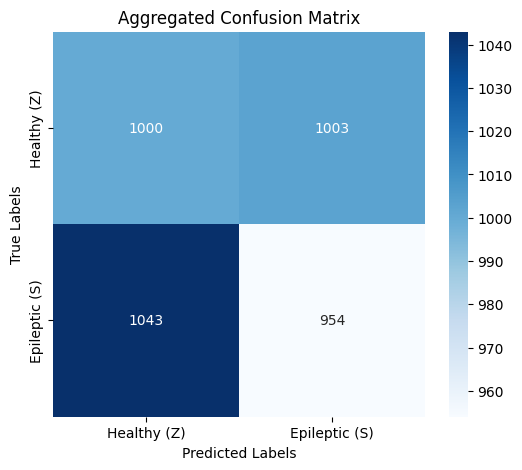

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

total_conf_matrix = np.zeros((2, 2))

base_dir = "ML_dataset/ML_dataset"
directories = ['S', 'Z']
labels_map = {'S': 1, 'Z': 0}  # 1 = epileptic, 0 = healthy

X, y = [], []

for folder_name in directories:
    folder_path = os.path.join(base_dir, folder_name)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        #print(f"Loading: {file_path}")
        data = np.loadtxt(file_path)
        X.append(data)  #
        y.append(labels_map[folder_name])

X = np.array(X)
y = np.array(y)
repeats = 100
accuracies = []

for i in range(repeats):
    print(f"Iteration {i+1}/{repeats}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    mlp = MLPClassifier(hidden_layer_sizes=(16, 8, 1), solver='adam', activation='tanh', max_iter=10000)
    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    total_conf_matrix += confusion_matrix(y_test, y_pred)

print("Accuracies across 100 iterations:", accuracies)
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print("Aggregated Confusion Matrix:\n", total_conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Healthy (Z)', 'Epileptic (S)']
plt.figure(figsize=(6, 5))
sns.heatmap(total_conf_matrix, annot=True, fmt=".0f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Aggregated Confusion Matrix")
plt.show()


MS dataset

In [9]:
import zipfile
import os

# Extract MS dataset
uploaded_file_path = "MS_dataset.zip"
extraction_dir = "MS_dataset"

with zipfile.ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")


Files extracted to: MS_dataset


MS neural network

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4211 - loss: 1.2433 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.5789 - loss: 10.2032 - val_accuracy: 1.0000 - val_loss: 0.0414
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.7368 - loss: 2.5292 - val_accuracy: 0.2000 - val_loss: 6.1473
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.8421 - loss: 0.3548 - val_accuracy: 0.2000 - val_loss: 12.7750
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.9474 - loss: 0.6349 - val_accuracy: 0.2000 - val_loss: 14.1640
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9474 - loss: 0.1339 - val_accuracy: 0.2000 - val_loss: 13.3012
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.2000 - val_loss: 12.5029
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 8.4485e-04 - val_accuracy: 0.20

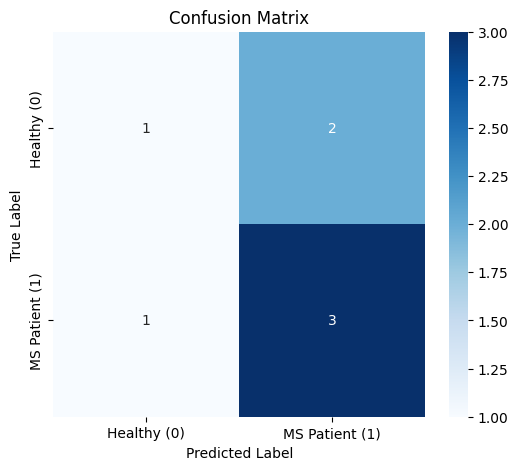

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

base_dir = "MS_dataset/text file/text file"  # Path to the 'text file' directory

# Define the labels for the two classes
labels_map = {'healthy control': 0, 'multiple sclerosis': 1}  # 0 = Healthy, 1 = MS Patient

X, y = [], []
max_length = 1500  # Fixed length for all time series

# Iterate through the subdirectories ('healthy control' and 'multiple sclerosis')
for condition in labels_map.keys():
    condition_dir = os.path.join(base_dir, condition)
    if os.path.isdir(condition_dir):
        for file in os.listdir(condition_dir):
            if file.endswith(".txt"):  # Ensure only .txt files are processed
                file_path = os.path.join(condition_dir, file)
                if os.path.isfile(file_path):
                    try:
                        data = np.loadtxt(file_path)  # Load time series data
                        X.append(data)
                        y.append(labels_map[condition])  # Assign the corresponding label
                    except ValueError:
                        print(f"Warning: Could not load data from {file_path}")

if len(X) == 0:
    raise ValueError("No valid data files found in the dataset folder. Please check your files.")

X = np.array(X)

# Pad the sequences to ensure they all have the same length (max_length)
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')

# Reshape the data to ensure it's a 2D array with shape (num_samples, max_length * num_features)
# For example, if each time step has 257 features, reshape the data to (num_samples, max_length * 257)
X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length * 257,)),  # Adjust input shape to (1500 * 257)
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on the test set
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6, 5))
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy (0)', 'MS Patient (1)'],
            yticklabels=['Healthy (0)', 'MS Patient (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
